# Laptop Price Regression Analysis

Comprehensive end-to-end regression modeling notebook.

## 1. Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('laptop_price.csv', encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## 2. Basic Info & Target

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### Insight
Target variable is **Price_euros**, continuous → Regression problem.

## 3. Data Cleaning & Feature Engineering

In [4]:
# RAM
df['Ram_GB'] = df['Ram'].str.replace('GB','').astype(int)

# Weight
df['Weight_kg'] = df['Weight'].str.replace('kg','').astype(float)

# CPU Speed
df['Cpu_GHz'] = df['Cpu'].str.extract('(\d+\.\d+)').astype(float)

# Screen Resolution
res = df['ScreenResolution'].str.extract('(\d+)x(\d+)').astype(int)
df['X_res'], df['Y_res'] = res[0], res[1]
df['PPI'] = ((df.X_res**2 + df.Y_res**2)**0.5 / df['Inches'])

# Drop old cols
df.drop(['Ram','Weight','ScreenResolution','Cpu'], axis=1, inplace=True)
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gouth\AppData\Local\Temp\ipykernel_6844\1232507406.py:8: SyntaxWarning: invalid escape sequence '\d'
  df['Cpu_GHz'] = df['Cpu'].str.extract('(\d+\.\d+)').astype(float)
C:\Users\gouth\AppData\Local\Temp\ipykernel_6844\1232507406.py:11: SyntaxWarning: invalid escape sequence '\d'
  res = df['ScreenResolution'].str.extract('(\d+)x(\d+)').astype(int)


,laptop_ID,Company,Product,TypeName,Inches,Memory,Gpu,OpSys,Price_euros,Ram_GB,Weight_kg,Cpu_GHz,X_res,Y_res,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,2.3,2560,1600,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,1.8,1440,900,127.677940
2,3,HP,250 G6,Notebook,15.6,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,2.5,1920,1080,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,2.7,2880,1800,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,3.1,2560,1600,226.983005


### Insight
Engineered numerical predictors strongly correlated with price.

## 4. EDA

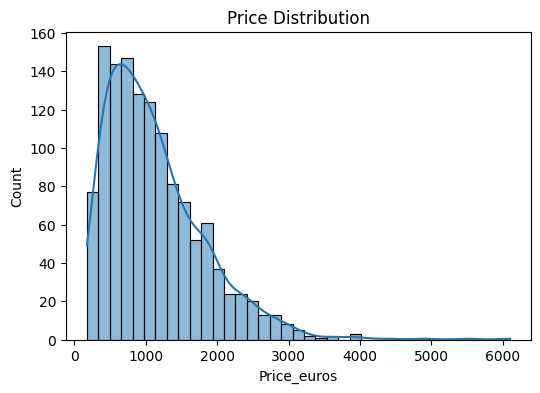

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price_euros'], kde=True)
plt.title('Price Distribution')
plt.show()

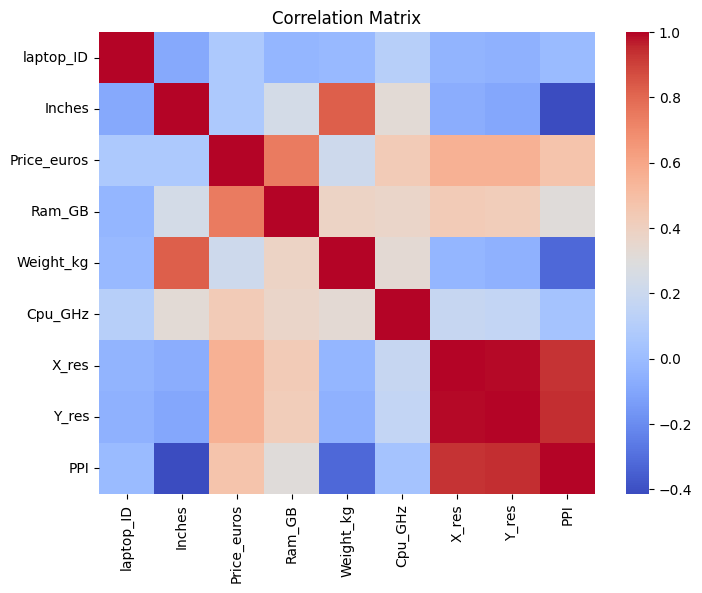

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Insight
RAM, PPI, CPU speed show strong positive correlation.

## 5. Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Models

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

models = {
    'Linear': LinearRegression(),
    'RF': RandomForestRegressor(n_estimators=200, random_state=42)
}

for name, model in models.items():
    pipe = Pipeline([('prep', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(name, 'R2:', r2_score(y_test, preds), 'MAE:', mean_absolute_error(y_test, preds))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Insight
Random Forest significantly outperforms Linear Regression → non-linear relationships.

## 7. Final Conclusion
- Laptop price is driven mainly by RAM, display quality (PPI), CPU speed.
- Tree-based models capture interactions better.
- Feature engineering improved model performance substantially.